# Great Tutorial of Gaussian Processes



[ML Tutorial: Gaussian Processes (Richard Turner)](https://www.youtube.com/watch?v=92-98SYOdlY)

At 40:32 (from the video), there is an equation for $p(y_1|y_2)$. For a detailed explanation see [1] Pag.111, the proof can be found in [1] Section 4.3.4.


[Great Notebook that already implemented most of the ideas I had](https://peterroelants.github.io/posts/gaussian-process-tutorial/)

[Amazing Demo of GPs that implements the app I was thinking of](http://www.tmpl.fi/gp/)


## Other resources





Slide Deck
http://learning.eng.cam.ac.uk/pub/Public/Turner/Presentations/gp-approximation.pdf

another Richard Turner Presentation
https://www.youtube.com/watch?v=sQmsQq_Jfi8


Richard Turner website
http://cbl.eng.cam.ac.uk/Public/Turner/Teaching

Courses from Cambridge
https://github.com/baegwangbin/MLMI

Camdrige Master 
MPhil in Machine Learning and Machine Intelligence
Core Courses
https://www.mlmi.eng.cam.ac.uk/core-modules


[Application Example Neil Lawrence](http://inverseprobability.com/talks/notes/introduction-to-deep-gps.html)

http://www.gaussianprocess.org/gpml/code/matlab/doc/

# References

[1] Murphy, K. P. (2012). Machine learning: A probabilistic perspective. Cambridge, Mass: MIT Press.

[2] [Gaussian Processes for Machine Learning](http://www.gaussianprocess.org/gpml/chapters/RW.pdf)

# ¿Qué quiero hacer?
Veo que hay una muy buena oportunidad para:
- crear un tutorial en el que finalmente puedo mostrar la conexión entre funciones y vectores.
- usar dash para generar aplicaciones donde se pueda interactuar con las funciones a través de los distintos hiper-parametros (kernel, l, $\sigma$)


In [ ]:
#@title Installing scipy
!pip install scipy --upgrade

     |████████████████████████████████| 25.9MB 172kB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1


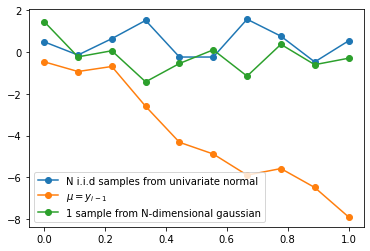

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import plotly
np.random.seed(42)

N = 10

# Create  a grid of N points between 0 and 1
x = np.linspace(0, 1, N)

# Sample N independendent samples from a Normal(mu=0, sigma=1)
# Each sample is independent of each other 
y = np.random.normal(0, 1, N)
plt.plot(x, y, 'o-', label='N i.i.d samples from univariate normal')

# Sample N samples where  y_i ~ Normal(mu=y_{i-1}, sigma=1)
y = np.zeros_like(x)
for i in range(N):
    y[i] = np.random.normal(y[i-1], 1)
plt.plot(x, y, 'o-', label='$\mu = y_{i-1}$')

# Sample 1 sample from an N-dimensional gaussian
y = np.random.multivariate_normal(np.zeros(N), np.eye(N))
plt.plot(x, y, 'o-', label='1 sample from N-dimensional gaussian')

plt.legend()

# Exponential quadratic (RBF) Kernel

Q2 - ¿how can we express the way two points $(x_i,y_i)$ are related? ¿What kind of relationship we can describe?

In [ ]:
N=20
x = np.linspace(0, 1, N)

# l is a parameter that regulates how fast neighbouring 
# points will become uncorrelated (smaller l, faster they become uncorrelated)
l = 4
# we can add an scaling factor s to regulate between which values it will vary 
s = 1

k = lambda x, xp : s* np.exp(-((x-xp)**2)/(2*(l**2)))
k = np.vectorize(k)

In [ ]:
S = k(np.tile(np.arange(N),(N,1)),np.tile(np.arange(N),(N,1)).transpose())

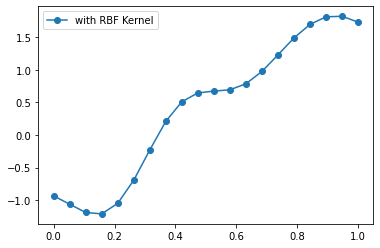

In [ ]:
# Sample 1 sample from an N-dimensional gaussian
y = np.random.multivariate_normal(np.zeros(N), S)
plt.plot(x, y, 'o-', label='with RBF Kernel')
plt.legend()

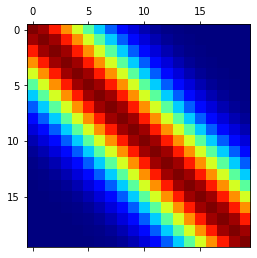

In [ ]:
plt.matshow(S,cmap=plt.cm.jet)

[Code From](https://peterroelants.github.io/posts/gaussian-process-tutorial/)

In [ ]:
# code from https://peterroelants.github.io/posts/gaussian-process-tutorial/

From https://www.cs.toronto.edu/~duvenaud/cookbook/

## Exponentiated Quadratic Kernel

$${\displaystyle K(\mathbf {x} ,\mathbf {x'} )= \sigma^2 \exp \left(-{\frac {\|\mathbf {x} -\mathbf {x'} \|_{2}^{2}}{2 l ^{2}}}\right)}$$

Neil Lawrence says that this kernel should be called the "Exponentiated Quadratic". The SE kernel has become the de-facto default kernel for GPs and SVMs. This is probably because it has some nice properties. It is universal, and you can integrate it against most functions that you need to. Every function in its prior has infinitely many derivatives. It also has only two parameters:
- The lengthscale $l$ determines the length of the 'wiggles' in your function. In general, you won't be able to extrapolate more than ℓ units away from your data.
- The output variance $\sigma^2$ determines the average distance of your function away from its mean. Every kernel has this parameter out in front; it's just a scale factor.

In [ ]:
from scipy import spatial
import numpy
def exponentiated_quadratic(X:numpy.array, Xp:numpy.array, sigma_f:float=1, l:float=1):
    """Computes the Gram matrix Kij = k(xi,xj).

    Args:
        X (numpy.array): An (m,n) array representing m observations in an n-dimensional space. Inputs are converted to float.  
        Xp (numpy.array): An (m,n) array representing m observations in an n-dimensional space. Inputs are converted to float.  
        sigma_f (float, optional):  The output standard deviation determines the average distance of your function away from its mean. Defaults to 1.
        l (float, optional): The lengthscale determines the length of the 'wiggles' in the function. Defaults to 1.

    Returns:
        numpy.array: Gram matrix
    """
    sq_norm = spatial.distance.cdist(X, Xp, 'sqeuclidean')
    K = sigma_f**2 * np.exp((-sq_norm/(2*l**2)))
    return K

\begin{equation}
p(\theta|\cal{D}) = \frac{p(\cal{D}|\theta)p(\theta)}{p(\cal{D})}
\end{equation}

\begin{equation}
p(f|x_{1}, y_{1}) = \frac{p(x_{1}, y_{1}|f)p(f)}{p(x_{1}, y_{1})}
\end{equation}

and then

\begin{equation}
p(y_{2}| x_{1}, y_{1}, x_{2}) = \int p(y_{2} | f,x_{2})p(f|\cal{x_{1}, y_{1}}) \, df
\end{equation}



\begin{equation}

p(y_{2}|x_{1}, y_{1}, x_{2}) = \cal{N}(y_{2}|\mu_{2|1},\Sigma_{2|1}) \\

\mu_{2|1} = \mu_{2} + \Sigma_{21} \Sigma^{-1}_{11} (y_{1} - \mu_{1}) \\

\Sigma_{2|1} = \Sigma_{22} - \Sigma_{21} \Sigma^{-1}_{11} \Sigma_{12}

\end{equation}

In [ ]:
# Gaussian process posterior
def GP(X1:np.array, Y1:np.array, X2:np.array, kernel_func):
    """Computes the mean and covariance matrices of the mutlivariate gaussian of the posterior 
    $p(Y_2|X1, Y1, X2)$. It assummes mu_1 and mu_2 = 0.

    Args:
        X1 (np.array): An (m1 x n_x) matrix with m1 training x observations of n_x-dimensions.
        Y1 (np.array): An (m1 x n_y) matrix with m1 training y observations of n_y-dimensions.
        X2 (np.array): An (m2 x n_x) matrix with m2 test x observations of n_x-dimensions.
        kernel_func ([type]): Function that computes the Gram matrix for a specific kernel

    Returns:
        np.array ,np.array: mean and covariance matrices
    """

    # Kernel of the observations
    K11 = kernel_func(X1, X1)
    # Kernel of observations vs to-predict
    K12 = kernel_func(X1, X2)
    # Solve A @ X = B -> K11 @ X = K12 -> X = inv(K11) @ K12 = (K21 @ inv(K11)).T  
    K21invK11 = scipy.linalg.solve(K11, K12, assume_a='pos').T
    # Compute posterior mean
    mu2 = K21invK11 @ Y1
    
    K22 = kernel_func(X2, X2)
    # Compute the posterior covariance
    S2 = K22 - (K21invK11 @ K12)
    return mu2, S2

In [ ]:
# Compute the posterior mean and covariance

# Define the true function that we want to regress on
f_sin = lambda x: (0.48*np.sin(2*x)+1.2).flatten()

n1 = 8  # Number of points to condition on (training points)
n2 = 75  # Number of points in posterior (test points)
ny = 5  # Number of functions that will be sampled from the posterior
domain = (-6, 6)

In [ ]:
# Sample observations (X1, y1) on the function
X1 = np.random.uniform(domain[0]+2, domain[1]-2, size=(n1,1))
y1 = f_sin(X1)
# Predict points at uniform spacing to capture function
X2 = np.linspace(domain[0], domain[1], n2).reshape(-1,1)

In [ ]:
# Compute posterior mean and covariance
mu2, S2 = GP(X1, y1, X2, exponentiated_quadratic)

In [ ]:
# Compute the standard deviation at the test points to be plotted
sigma2 = np.sqrt(np.diag(S2))

# Draw some samples of the posterior
y2 = np.random.multivariate_normal(mean=mu2, cov=S2, size=ny)

In [ ]:
import plotly.graph_objects as go

fig = go.Figure([
                  go.Scatter(
                      name='$\sin(x)$',
                      x=X2.ravel(), 
                      y=f_sin(X2),
                      mode='markers+lines',
                  ),
                  go.Scatter(
                      name='$2 \sigma_{2|1}$',
                      x=X2.ravel(),
                      y=mu2,
                      mode='lines',
                      line=dict(color='rgb(31, 119, 180)'),
                  ),
                  go.Scatter(
                      name='Upper Bound',
                      x=X2.ravel(),
                      y=mu2+2*sigma2,
                      mode='lines',
                      marker=dict(color="#444"),
                      line=dict(width=0),
                      showlegend=False
                  ),
                  go.Scatter(
                      name='Lower Bound',
                      x=X2.ravel(),
                      y=mu2-2*sigma2,
                      marker=dict(color="#444"),
                      line=dict(width=0),
                      mode='lines',
                      fillcolor='rgba(68, 68, 68, 0.3)',
                      fill='tonexty',
                      showlegend=False
                  ),
                  go.Scatter(
                        name='$(x_1, y_1)$',
                        x=X1.ravel(), 
                        y=y1,
                        mode='markers',
                    ),
                 
                ])

fig.update_layout(showlegend=True)
fig.show()

In [ ]:
# Gaussian process posterior
def GP_noise(X1:np.array, Y1:np.array, X2:np.array, kernel_func,sigma_y):
    """Computes the mean and covariance matrices of the mutlivariate gaussian of the posterior 
    $p(Y_2|X1, Y1, X2)$. It assummes mu_1 and mu_2 = 0.

    Args:
        X1 (np.array): An (m1 x n_x) matrix with m1 training x observations of n_x-dimensions.
        Y1 (np.array): An (m1 x n_y) matrix with m1 training y observations of n_y-dimensions.
        X2 (np.array): An (m2 x n_x) matrix with m2 test x observations of n_x-dimensions.
        kernel_func ([type]): Function that computes the Gram matrix for a specific kernel
        sigma_y (float): noise in the y observations

    Returns:
        np.array ,np.array: mean and covariance matrices
    """

    # Kernel of the observations
    K11 = kernel_func(X1, X1) + ((sigma_y ** 2) * np.eye(X1.shape[0]))
    # Kernel of observations vs to-predict
    K12 = kernel_func(X1, X2)
    # Solve A @ X = B -> K11 @ X = K12 -> X = inv(K11) @ K12 = (K21 @ inv(K11)).T  
    K21invK11 = scipy.linalg.solve(K11, K12, assume_a='pos').T
    # Compute posterior mean
    mu_2 = K21invK11 @ Y1
    
    K22 = kernel_func(X2, X2)
    # Compute the posterior covariance
    S_2 = K22 - (K21invK11 @ K12)
    return mu_2, S_2

In [ ]:
# Compute the posterior mean and covariance
sigma_y = 1.  # The standard deviation of the noise

# Add noise kernel to the samples we sampled previously
y1 = y1 + ((sigma_y ** 2) * np.random.randn(n1))

# Compute posterior mean and covariance
mu2, S2 = GP_noise(X1, y1, X2, exponentiated_quadratic, sigma_y)
# Compute the standard deviation at the test points to be plotted
sigma2 = np.sqrt(np.diag(S2))

# Draw some samples of the posterior
y2 = np.random.multivariate_normal(mean=mu2, cov=S2, size=ny)

In [ ]:
import plotly.graph_objects as go

fig = go.Figure([
                  go.Scatter(
                      name='$\sin(x)$',
                      x=X2.ravel(), 
                      y=f_sin(X2),
                      mode='markers+lines',
                  ),
                  go.Scatter(
                      name='$2 \sigma_{2|1}$',
                      x=X2.ravel(),
                      y=mu2,
                      mode='lines',
                      line=dict(color='rgb(31, 119, 180)'),
                  ),
                  go.Scatter(
                      name='Upper Bound',
                      x=X2.ravel(),
                      y=mu2+2*sigma2,
                      mode='lines',
                      marker=dict(color="#444"),
                      line=dict(width=0),
                      showlegend=False
                  ),
                  go.Scatter(
                      name='Lower Bound',
                      x=X2.ravel(),
                      y=mu2-2*sigma2,
                      marker=dict(color="#444"),
                      line=dict(width=0),
                      mode='lines',
                      fillcolor='rgba(68, 68, 68, 0.3)',
                      fill='tonexty',
                      showlegend=False
                  ),
                  go.Scatter(
                        name='$(x_1, y_1)$',
                        x=X1.ravel(), 
                        y=y1,
                        mode='markers',
                    ),
                 
                ])

fig.update_layout(showlegend=True)
fig.show()

# Application

[Machine learning - Bayesian optimization and multi-armed bandits](https://www.youtube.com/watch?v=vz3D36VXefI)

In [ ]:
# Sample observations (X1, y1) on the function
X1 = np.random.uniform(domain[0]+2, domain[1]-2, size=(n1,1))
y1 = f_sin(X1)
# Predict points at uniform spacing to capture function
X2 = np.linspace(domain[0], domain[1], n2).reshape(-1,1)

In [ ]:
x_train = X1
x_test = X2
y_train = y1
y=f_sin(x_test)

In [ ]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C


kernel = C(1.0, (1e-3, 1e3)) * RBF(0.004)
gp = GaussianProcessRegressor(kernel=kernel,random_state=0, n_restarts_optimizer=10)

gp.fit(x_train, y_train)

GaussianProcessRegressor(alpha=1e-10, copy_X_train=True,
                         kernel=1**2 * RBF(length_scale=0.004),
                         n_restarts_optimizer=10, normalize_y=False,
                         optimizer='fmin_l_bfgs_b', random_state=0)

In [ ]:
gp.get_params()

{'alpha': 1e-10,
 'copy_X_train': True,
 'kernel': 1**2 * RBF(length_scale=0.004),
 'kernel__k1': 1**2,
 'kernel__k1__constant_value': 1.0,
 'kernel__k1__constant_value_bounds': (0.001, 1000.0),
 'kernel__k2': RBF(length_scale=0.004),
 'kernel__k2__length_scale': 0.004,
 'kernel__k2__length_scale_bounds': (1e-05, 100000.0),
 'n_restarts_optimizer': 10,
 'normalize_y': False,
 'optimizer': 'fmin_l_bfgs_b',
 'random_state': 0}

In [ ]:
# Make the prediction on the meshed x-axis (ask for MSE as well)
y_pred, sigma = gp.predict(x_test, return_std=True)

In [ ]:
gp.kernel_

1.27**2 * RBF(length_scale=1.32)

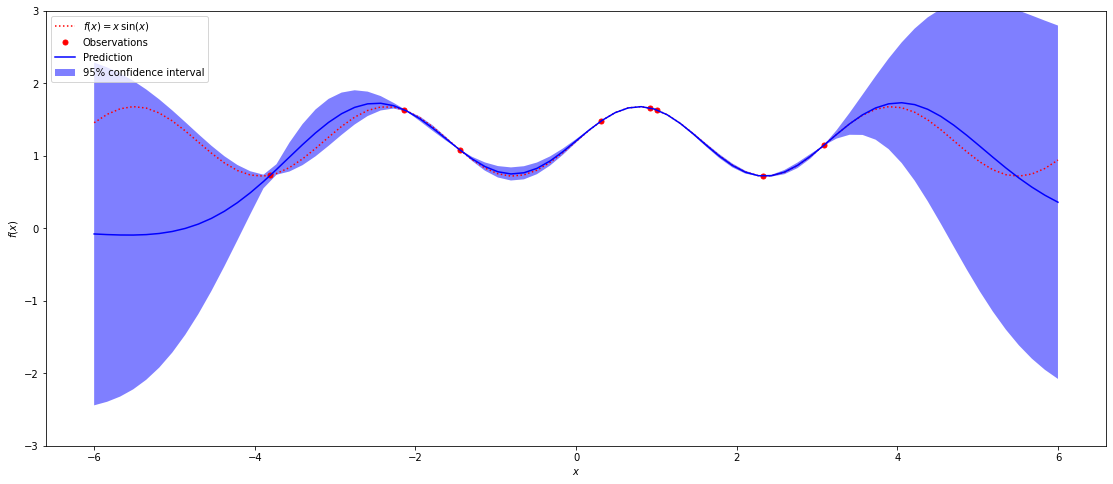

In [ ]:
# Plot the function, the prediction and the 95% confidence interval based on
# the MSE
plt.figure(figsize=(19,8))
plt.plot(x_test.ravel(), y.ravel(), 'r:', label=r'$f(x) = x\,\sin(x)$')
plt.plot(x_train, y_train, 'r.', markersize=10, label='Observations')
plt.plot(x_test, y_pred, 'b-', label='Prediction')
plt.fill(np.concatenate([x_test, x_test[::-1]]),
         np.concatenate([y_pred - 1.9600 * sigma,
                        (y_pred + 1.9600 * sigma)[::-1]]),
         alpha=.5, fc='b', ec='None', label='95% confidence interval')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.ylim(-3, 3)
plt.legend(loc='upper left')

In [ ]:
gp.log_marginal_likelihood()

-4.604661310251727

In [ ]:
gp.get_params()

{'alpha': 1e-10,
 'copy_X_train': True,
 'kernel': 1**2 * RBF(length_scale=0.004),
 'kernel__k1': 1**2,
 'kernel__k1__constant_value': 1.0,
 'kernel__k1__constant_value_bounds': (0.001, 1000.0),
 'kernel__k2': RBF(length_scale=0.004),
 'kernel__k2__length_scale': 0.004,
 'kernel__k2__length_scale_bounds': (1e-05, 100000.0),
 'n_restarts_optimizer': 10,
 'normalize_y': False,
 'optimizer': 'fmin_l_bfgs_b',
 'random_state': 0}

In [ ]:
gp.get_params()

{'alpha': 1e-10,
 'copy_X_train': True,
 'kernel': 1.05**2 * RBF(length_scale=1.05),
 'kernel__k1': 1.05**2,
 'kernel__k1__constant_value': 1.0985999999999991,
 'kernel__k1__constant_value_bounds': (0.001, 1000.0),
 'kernel__k2': RBF(length_scale=1.05),
 'kernel__k2__length_scale': 1.050299999999999,
 'kernel__k2__length_scale_bounds': (1e-05, 100000.0),
 'n_restarts_optimizer': 0,
 'normalize_y': False,
 'optimizer': 'fmin_l_bfgs_b',
 'random_state': 0}

From https://scikit-learn.org/stable/auto_examples/gaussian_process/plot_gpr_noisy.html

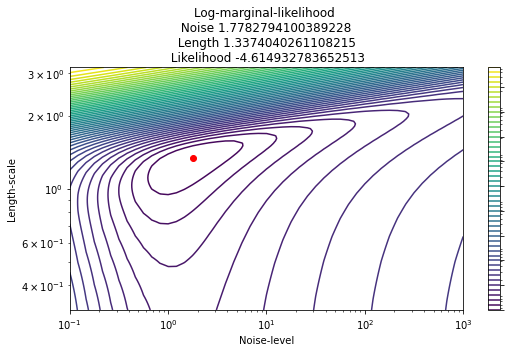

In [ ]:
from matplotlib import colors
# Plot LML landscape
plt.figure(figsize=(8,5))
# noise level
theta0 = np.logspace(-1, 3, 49)
# length scale
theta1 = np.logspace(-0.5, 0.5, 100)
Theta0, Theta1 = np.meshgrid(theta0, theta1)
LML = [[gp.log_marginal_likelihood(np.log([Theta0[i, j], Theta1[i, j]]))
        for i in range(Theta0.shape[0])] for j in range(Theta0.shape[1])]
LML = np.array(LML).T

vmin, vmax = (-LML).min(), (-LML).max()
#vmax = 50
level = np.around(np.logspace(np.log10(vmin), np.log10(vmax), 50), decimals=1)

ind = np.unravel_index(np.argmax(LML, axis=None), LML.shape)
min_theta0 = theta0[ind[1]]
min_theta1 = theta1[ind[0]]
plt.scatter(theta0[ind[1]],theta1[ind[0]],color='r')

plt.contour(Theta0, Theta1, -LML,
            levels=level, norm=colors.LogNorm(vmin=vmin, vmax=vmax))
plt.colorbar()
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Noise-level")
plt.ylabel("Length-scale")
plt.title(f"Log-marginal-likelihood \n Noise {min_theta0} \n Length {min_theta1} \n Likelihood {LML.max()}")
plt.tight_layout()

plt.show()